1\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and stardand deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

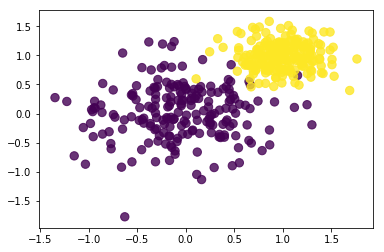

In [1]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import seaborn as sns

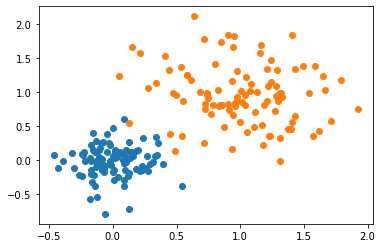

In [4]:
def create_dataset(mean, dev) : 
    return np.random.normal(mean, dev, 100)

x = create_dataset(0,0.2)
y = create_dataset(0,0.2)
x1 = create_dataset(1,0.4)
y1 = create_dataset(1, 0.4)
plt.scatter(x,y)
plt.scatter(x1,y1)
plt.show()

2\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn jointplot of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [5]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2021-12-03 00:22:14--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.66.18
Connecting to www.dropbox.com (www.dropbox.com)|162.125.66.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2021-12-03 00:22:15--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7995b4875f472503580026ac13.dl.dropboxusercontent.com/cd/0/inline/BbGep2lNZu9V2QIVi64tJ7nnq5r97ga4fj_Ygma5RilKhZke_K0201mQuVYkNBCysznEmPmng2dWlKmcCRxKcNA6ddNYcB7t4UmScUqvNS-8BBcxHfopaieg9wlb8m5Sxc-DPX-n6NE9b1mmoDwbQV4s/file# [following]
--2021-12-03 00:22:15--  https://uc7995b4875f472503580026ac13.dl.dropboxusercontent.com/cd/0/inline/BbGep2lNZu9V2QIVi64tJ7nnq5r97ga4fj_Ygma5RilKhZke_K0201mQuVYkNBCysznEmPmng2dWlKmcCRxKcNA6ddNYcB7t4UmSc

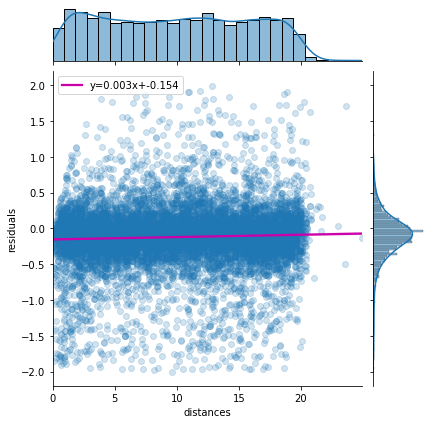

In [8]:
from scipy import stats

file = pd.read_pickle('data/residuals_261.pkl')
data_pickle = np.array(file, ndmin=1)
data = data_pickle[0]
df = pd.DataFrame(data)
df = df[np.abs(df['residuals'])<2]


slope, intercept, rvalue, pvalue, stderr = stats.linregress(df['distances'], df['residuals'])


joint = sns.jointplot(x='distances', y='residuals', data=df, kind='reg',scatter_kws={'alpha':0.2},line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept),'color':'#cc00aa'})
joint.ax_joint.legend()

Profile histogram for the "distance" variable by hand: 


Text(0, 0.5, 'Entries')

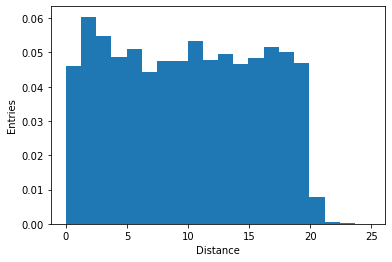

In [9]:
print('Profile histogram for the "distance" variable by hand: ')
fig, ax = plt.subplots()
h, bins, _ = plt.hist(df['distances'], bins=20, density=True, cumulative=False)

ax.set_xlabel('Distance')
ax.set_ylabel('Entries')

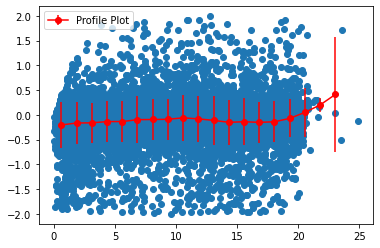

In [10]:
x = 0.5*(bins[1:] + bins[:-1])
y = np.zeros(x.size)
erry = np.zeros(x.size)


y=np.array([df.loc[(df['distances'] >=bins[i]) & (df['distances'] <bins[i+1])]['residuals'].mean() for i in range(20)])
erry=np.array([df.loc[(df['distances'] >=bins[i]) & (df['distances'] <bins[i+1])]['residuals'].std() for i in range(20)])


plt.scatter(df['distances'],df['residuals'])
plt.errorbar(x,y,erry, label='Profile Plot',linewidth=1.5,color='red',marker='o')
plt.legend()
plt.show()

3\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


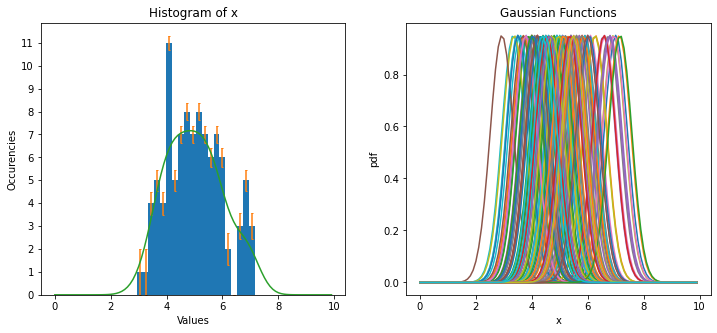

In [11]:
from matplotlib.ticker import MultipleLocator
from scipy.stats import norm
from scipy import integrate

#1st part

N = 100
mean = 5 
std = 1
x = np.random.normal(mean,std,N)
fig, (a,b) = plt.subplots(1,2,figsize=(12,5))
a.set_title('Histogram of x')
a.set_xlabel('Values')
a.set_ylabel('Occurencies')
a.yaxis.set_major_locator(MultipleLocator(1.0))
ni,bins,_ = a.hist(x,bins = 20)
bi = 0.5*(bins[1:]+bins[:-1])
poisson=[]
for i in range(len(ni)):
    if ni[i]!=0:
        poisson.append(1/np.sqrt(ni[i]))
    else:
        poisson.append(0)
a.errorbar(bi,ni,poisson,fmt='none',capsize=1)

#2nd part

b.set_title('Gaussian Functions')
b.set_xlabel('x')
b.set_ylabel('pdf')
axis = np.arange(0, 10, 0.1)
std = 1.06*x.std()*(x.size**(-1/5))
t_sum = 0
for i in x:
    norm_i= norm.pdf(axis,i,std)
    plt.plot(axis,norm_i)
    t_sum+=norm_i
    
#3rd part

integral_compute = integrate.trapz(t_sum,axis)
area_hist = 0
for i in range(0,len(bins)-1):
    area_hist+=ni[i]*(bins[i+1]-bins[i])
normalize_integral = t_sum*(area_hist/integral_compute)
a.plot(axis,normalize_integral)  
plt.show()